<a id='title'></a>
# Project: U.S. Medical Insurance Costs

<a id='table-of-contents'></a>
# Table of contents

- [Project: U.S. Medical Insurance Costs](#title)
- [Table of contents](#table-of-contents)
- [Introduction](#introduction)
  - [Project Description](#project-description)
  - [Project Objectives](#project-objectives)
  - [Personal Notes](#personal-notes)
    - [Challenges](#challenges)
    - [Learning goals](#learning-goals)
  - [Project Setup](#project-setup)
- [Initial Data Exploration](#initial-data-exploration)
  - [Quick Data Overview](#quick-data-overview)
  - [Data Dimensions](#data-dimensions)
  - [Handling Null Values](#handling-null-values)
  - [Removing Duplicate Values](#removing-duplicate-values)  
  - [Data Dimensions After Cleaning](#data-dimentions-after-cleaning) 
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Data Types](#data-types)
  - [Univariate Analysis](#univariate-analysis)
    - [Descriptive Statistics](#descriptive-statistics)
    - [Histograms (Numerical Variables)](#histograms)
    - [Bar Charts (Categorical Variables)](#bar-charts)
    - [Interpretation of Univariate Analysis (Numerical Variables)](#interpretation-of-univariate-analysis-numerical)
      - [Age](#univariate-age)
      - [BMI](#univartiate-bmi)
      - [Children](#uniariate-children)
      - [Charges](#univariate-charges)
    - [Interpretation of Univariate Analysis (Categorical Variables)](#interpretation-of-univariate-analysis-categorical)
        - [Sex](#univariate-sex)
        - [Smoker](#univariate-smoker)
        - [Region](#univariate-region)
  - [Bivariate Analysis](#bivariate-analysis)
  - [Correlation Analysis](#corrleation-analysis)
  - [Categorical Analysis](#categorical-analysis)
  - [Summary of the Exploratory Data Analysis findings](#summary-of-eda-findings)

<a id='introduction'></a>
# Introduction

<a id='project-description'></a>
## Project Description

For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

However, you're now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis. For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.



<a id='project-objectives'></a>
## Project Objectives

- Work locally on your own computer
- Import a dataset into your program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist in your analysis
- Optional: Document and organize your findings
- Optional: Make predictions about a dataset’s features based on your findings

<a id='personal-notes'></a>
## Personal Notes

<a id='challenges'></a>
### Challenges
- This is intended to be a "growing" project. While it won't be updated regularly post-completion, any critical improvements or updates deemed necessary will be implemented during the project phase.
- This is my first experience working with Git branches, which presents a learning curve for managing different versions of the project effectively.

<a id='learning-goals'></a>
### Learning goals
- Enhance my skills in exploratory data analysis, focusing on the variables and objectives specified by the project description.
- Learn the basics of Git branching to manage different stages and updates of this project effectively. This aligns with the challenge of using Git repositories for the first time and will be an invaluable skill for future projects. This will mostly be done using GitHub.


<a id='project-setup'></a>
## Project Setup

This first code cell will be used to import the necessary libraries and load the dataset into a dataframe.

In [805]:
# WARNING: This cell *needs* to be run *first* for the rest of the notebook to work.
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the data files
data_path = '../data'
raw_data_path = data_path + '/raw'
processed_data_path = data_path + '/processed'

# Define the path to the source file
source_file_path = raw_data_path + '/data.csv'

# Error handling for the source file
try:
    # Load the source file into a dataframe
    main_df = pd.read_csv(source_file_path)
    
    # Peek at the first five rows of the dataframe
    print(main_df.head())
except FileNotFoundError:
    print('The source file was not found')
    
# Library versions
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {plt.matplotlib.__version__}')    

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Pandas version: 2.0.3
Matplotlib version: 3.7.2


<a id='initial-data-exploration'></a>
# Initial Data Exploration

<a id='quick-data-overview'></a>
## Quick Data Overview

Before diving into an analysis of the data, it's important to get an initial feel for the data. This gives an idea of what the data looks like.

In [806]:
# Display the head of the dataframe
print(main_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [807]:
# Display the tail of the dataframe
print(main_df.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


At a first glance, the dataset seems to be fairly clean. There are no obvious issues and the values are all within a reasonable range.

<a id='data-dimensions'></a>
## Data Dimensions

Knowing the shape of the dataset helps to understand the size. This is important for understanding the usage of computational resources.

In [808]:
# Display the shape of the dataframe
print(main_df.shape)

(1338, 7)


The database consists of 1338 rows and seven columns. This is a fairly small dataset, which should be easy to work with.

<a id='handling-null-values'></a>
## Handling Null Values

Null values can cause data analysis and models to misbehave. It's important to know if there are any null values in the dataset and how to handle them.

In [809]:
# Check for null values in the dataframe
print(main_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no null values in the dataset. This is good news, as it means that there is no need to handle null values.

<a id='removing-duplicate-values'></a>
## Removing Duplicate Values

Duplicate entries mess with the data, as they skew the results. It's important to know if there are any duplicate values in the dataset and how to handle them.

In [810]:
# Check for duplicate values in the dataframe
print(main_df.duplicated().sum())

1


It looks like there is a single duplicate value in the dataset. Before removing it, it may be useful to see what the duplicate value is.

In [811]:
# Display the duplicate value
print(main_df[main_df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


This duplicate could be useful information. Since there are no names or IDs in the dataset, the only clue present to show that this is a duplicate is the charges value. This value is too specific to be a coincidence. For this reason, the duplicate value will be removed and only the first instance will be kept.

In [812]:
# Remove the duplicate value
main_df.drop_duplicates(inplace=True)

<a id='data-dimentions-after-cleaning'></a>
## Data Dimensions After Cleaning

After cleaning the dataset, it's important to check the dimensions again. This will help determine if the cleaning process was successful. In this instance, the number of rows should be reduced by one.

In [813]:
# Display the shape of the dataframe
print(main_df.shape)

(1337, 7)


The number of rows has been reduced by one, which means that the duplicate value was successfully removed.

<a id='saving-the-cleaned-data'></a>
## Saving the Cleaned Data

Before proceeding with any analysis, it's important to save the cleaned data into a new `.csv` file. This could help other people to use the data that's being analyzed.

In [814]:
# Define the path to the destination file
destination_file_path = processed_data_path + '/data_cleaned.csv'

# Save the dataframe into a new csv file
main_df.to_csv(destination_file_path, index=False)

<a id='exploratory-data-analysis'></a>
# Exploratory Data Analysis

The Exploratory Data Analysis (EDA) is the main part of this project. This section aims to deep dive into the data and extract useful information, presenting a comprehensive understanding of its structure, relationships, and patterns. The EDA will be broken down into the following sections:

- Data types: The types of data present in the dataset.
- Univariate Analysis: The analysis of a single variable.
- Bivariate Analysis: The analysis and relationship between two variables.
- Correlation Analysis: The quantification of the strength of the relationship between two variables.
- Categorical Analysis: The analysis of categorical variables.

Finally, the section concludes with a summary that goes of the key findings of the EDA.

<a id='data-types'></a>
## Data Types

This short section will be used to review the data types which are present in the dataset. This is important since it can determine how each variable should be analyzed.

In [815]:
# Display the data types of the dataframe
print(main_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The data types shows that there are four numerical variables and three categorical variables:

Numerical variables: `age`, `bmi`, `children`, `charges`.
- The numerical variables will be analyzed using descriptive statistics and histograms. Box plots will also be used to determine if there are any outliers in the data if the descriptive statistics and histograms show that there is a high variability in the data.

In [816]:
# Select the numerical variables
numerical_fields = main_df.select_dtypes(include='number').columns

Categorical variables: `sex`, `smoker`, `region`.
- The categorical variables will be analyzed using bar charts. Additionally, if the categorical variables are ordinal, then they will be analyzed using descriptive statistics.

In [817]:
# Select the categorical variables
categorical_fields = main_df.select_dtypes(include='object').columns

<a id='univariate-analysis'></a>
## Univariate Analysis

This section consists of a univariate analysis for each variable in the dataset. The analysis will be done using the `describe()` method and a series of histograms. The main focus of this histogram is to find patterns in the data.

<a id='descriptive-statistics'></a>
### Descriptive Statistics

It's important to review the standard descriptive statistics. This gives a good idea for the distribution of the data. This only applies to the numerical variables, as the categorical variables don't have a mean or standard deviation.

In [818]:
# Obtain the descriptive statistics for the dataframe
description = main_df.describe()

# Display the descriptive statistics
print(description)

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


For the categorical variables, each one of them needs to be reviewed individually. Firstly, finding out if they are ordinal will determine if the descriptive statistics can be used.

In [819]:
# Loop through the categorical variables and find the unique values
for variable in categorical_fields:
    print(f'Variable "{variable}": {len(main_df[variable].unique())} unique values.')

Variable "sex": 2 unique values.
Variable "smoker": 2 unique values.
Variable "region": 4 unique values.


The categorical variables are all ordinal, which means the descriptive statistics can be used. First, finding the mode will help to determine the most common value.

In [820]:
# For each variable show, the total amount of times each value appears, percentage and determine the mode
for variable in categorical_fields:
    # Variable name
    print(f'Variable "{variable}":')
    
    # For each value, show the quantity and percentage
    for value in main_df[variable].unique():
        quantity = main_df[variable].value_counts()[value]
        percentage = round(main_df[variable].value_counts(normalize=True)[value] * 100, 2)
        print(f'"{value}": {quantity} ({percentage}%)')
        
    # Show the mode
    print(f'Mode: "{main_df[variable].mode()[0]}"\n')

Variable "sex":
"female": 662 (49.51%)
"male": 675 (50.49%)
Mode: "male"

Variable "smoker":
"yes": 274 (20.49%)
"no": 1063 (79.51%)
Mode: "no"

Variable "region":
"southwest": 325 (24.31%)
"southeast": 364 (27.23%)
"northwest": 324 (24.23%)
"northeast": 324 (24.23%)
Mode: "southeast"


<a id='histograms'></a>
### Histograms (Numerical Variables)

Before analyzing any of the statistics, creating a histogram for each of the numerical variables can help to further understand the data. 

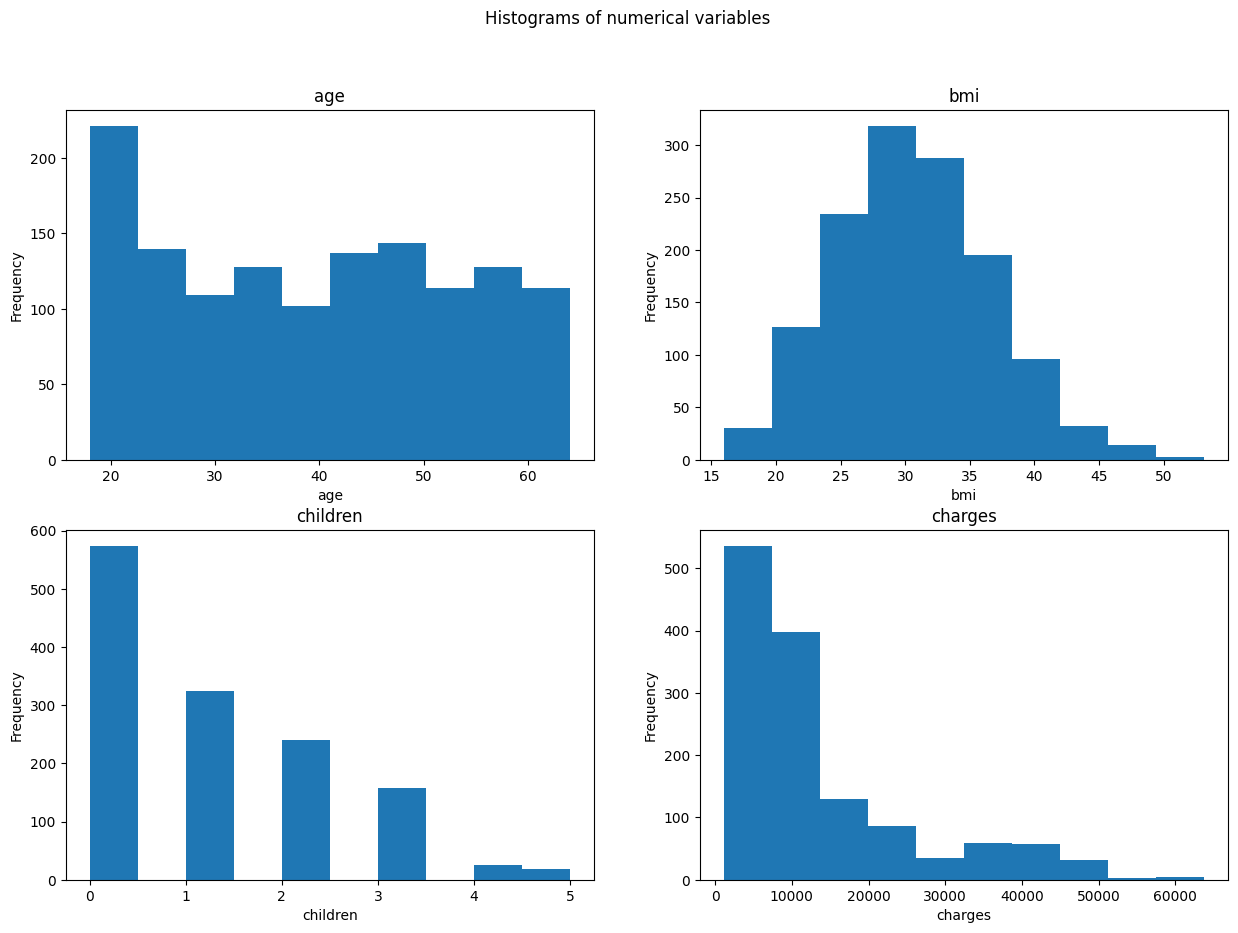

In [821]:
# Create a figure with subplots
figure, axes = plt.subplots(2, 2, figsize=(15, 10))
figure.suptitle('Histograms of numerical variables')
axes = axes.flatten()

# Create a histogram for each of the numerical variables
for n, field in enumerate(numerical_fields):
    axes[n].hist(main_df[field])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()

<a id='bar-charts'></a>
### Bar Charts (Categorical Variables)

Visualizing the values of the categorical variables can help to understand the data. This can be accomplished by creating a bar chart for each of the categorical variables.

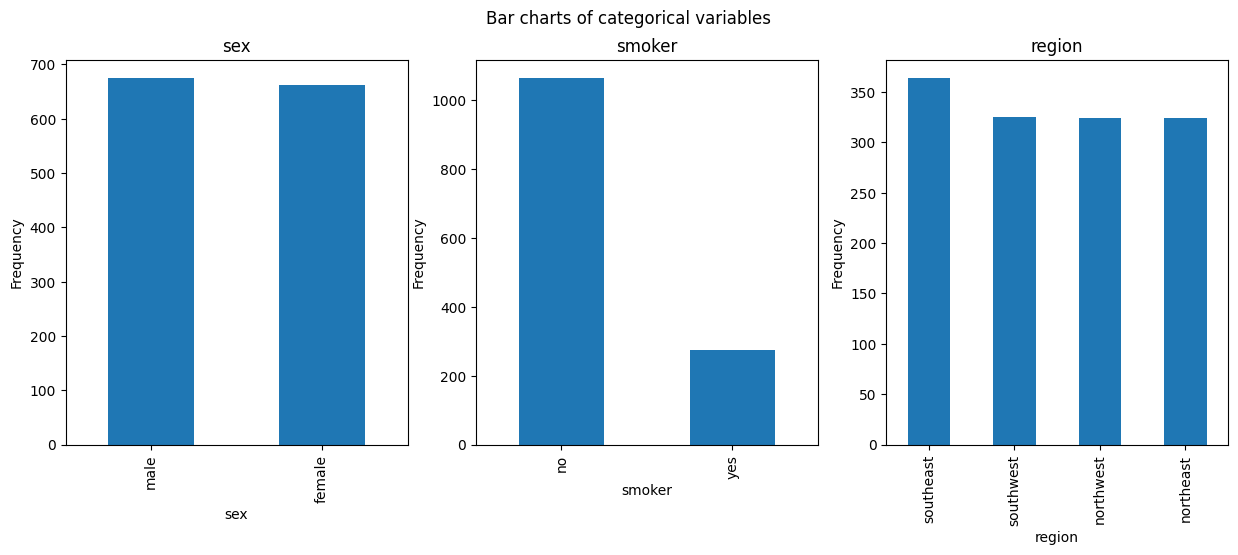

In [822]:
# Create a figure with subplots
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
figure.suptitle('Bar charts of categorical variables')
axes = axes.flatten()

# Create a bar chart for each of the categorical variables
for n, field in enumerate(categorical_fields):
    main_df[field].value_counts().plot(kind='bar', ax=axes[n])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()

<a id='interpretation-of-univariate-analysis-numerical'></a>
### Interpretation of Univariate Analysis (Numerical Variables)

<a id='univariate-age'></a>
#### Age

The `age` of the patients is fairly evenly distributed, with a slight skew towards the younger ages in the 20s group. The mean age is 39 years old, with a standard deviation of 14 years. The youngest patient is 18 years old, and the oldest patient is 64 years old. The high standard deviation indicates that the data is spread out over a wide range of values, which can indicate that the age of the patients is not a good indicator of the insurance costs.

<a id='univariate-bmi'></a>
#### BMI

The histogram for `bmi` shows that the distribution is normal with a bell curve skewed to the right. The mean 30.66, with a standard deviation of 6.1, indicates a moderate variability. The range goes from 16 to 52. A BMI of 30 and above is normally falls under the category of obesity. Since the `bmi` values tend to be around the mean, this could potentially mean that it has an impact on insurance costs. The histogram also shows that there could be presence of outliers, creating a box plot will help to visualize this.

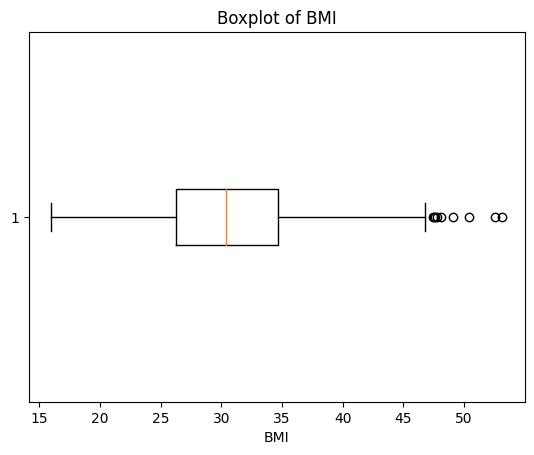

In [823]:
# Create a boxplot for the BMI variable
plt.boxplot(main_df['bmi'], vert=False)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

Although the boxplot shows that there are outliers, the number looks to be small, but determining the amount may help to clarify this. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [824]:
# Calculate the interquartile range
bmi_iqr = main_df['bmi'].quantile(0.75) - main_df['bmi'].quantile(0.25)

# Calculate the upper and lower bounds
bmi_upper_bound = main_df['bmi'].quantile(0.75) + 1.5 * bmi_iqr
bmi_lower_bound = main_df['bmi'].quantile(0.25) - 1.5 * bmi_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['bmi'] < bmi_upper_bound) & (main_df['bmi'] > bmi_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1328
Percentage of rows removed: 0.67% (9 rows).


The new dataframe has 1329 rows, which means that nine rows were removed. This number of rows represents 0.67% of the original dataset. This is a very small amount of data. For this reason, the outliers will be kept in the dataset, although further analysis could prove useful, but this is outside the scope of this project.

<a id='univariate-children'></a>
#### Children

There are larger numbers of patients without children. The histogram is skewed to the right, with a mean of 1.09 and a standard deviation of 1.21, meaning a high variation for the min and max values of 0 and 5 respectively. This variable could potentially have an impact on the insurance costs, although the standard deviation indicates that it may not be a good indicator.


<a id='univariate-charges'></a>
#### Charges

The charges histogram is skewed to the right, with a mean of 13270.42 and a standard deviation of 12110.01. The range goes from 1121 to 63770. This indicates a high variability in the data, which could mean that this variable is a good indicator of the insurance costs. It's worth noting that the minimum value is very low compared to the maximum value, which could indicate that there are outliers in the data. To visualize this, a boxplot will be created in the next section.

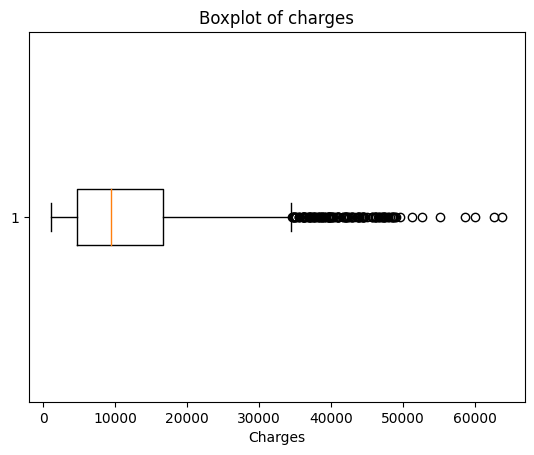

In [825]:
# Create a boxplot for the charges variable
plt.boxplot(main_df['charges'], vert=False)
plt.title('Boxplot of charges')
plt.xlabel('Charges')
plt.show()

The box plot shows that there outliers in the data. Determining how many outliers there are could help to better understand the data. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [826]:
# Calculate the interquartile range
charges_iqr = main_df['charges'].quantile(0.75) - main_df['charges'].quantile(0.25)

# Calculate the upper and lower bounds
charges_upper_bound = main_df['charges'].quantile(0.75) + 1.5 * charges_iqr
charges_lower_bound = main_df['charges'].quantile(0.25) - 1.5 * charges_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['charges'] < charges_upper_bound) & (main_df['charges'] > charges_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1198
Percentage of rows removed: 10.4% (139 rows).


The new dataframe has 1198 rows, which means that 139 rows were removed. This number of rows represents 10.4 of the original dataset. This is a significant amount of data. Further analysis of the outliers could help determine if they should be removed or not (or if a portion of them should be removed), although this is, yet again, outside the scope of this project. For this reason, the outliers will be kept in the dataset.

<a id='interpretation-of-univariate-analysis-categorical'></a>
### Interpretation of Univariate Analysis (Categorical Variables)

<a id='univariate-sex'></a>
#### Sex

The values of the `sex` variable show that each value appears roughly fifty percent of the time. This means that the data is evenly distributed between the these two values. The frequency of each value is 676 for `male` and 662 for `female`. The mode is `male`, which means that the most common value is `male`, although the difference is very small with a difference of 14 values (0.98%), meaning that the `sex` could have little to no weight in the insurance costs.

<a id='univariate-smoker'></a>
#### Smoker

The `smoker` variable presents a bigger difference between the values with 1063 (79.51%) for `no` and 274 (20.49%) for `yes`. The mode is `no`, which means that the most common value is `no`. This difference may mean that the `smoker`variable could have a big impact on the insurance costs.

<a id='univariate-region'></a>
#### Region

The distribution of the values for the `region` variable is fairly even, except for the `southeast` region, which has 364 (27.23%) values, which makes it the most common value. This mode and related to otherwise even distribution of the other values means that the `region` variable could have a small but not insignificant impact on the insurance costs. 

<a id='bivariate-analysis'></a>
## Bivariate Analysis



<a id='corrleation-analysis'></a>
## Correlation Analysis

<a id='categorical-analysis'></a>
## Categorical Analysis

<a id='summary-of-eda-findings'></a>
## Summary of the Exploratory Data Analysis findings